In [1]:
#Iris Flower Data Set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("iris.csv")

In [4]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

# exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [7]:
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

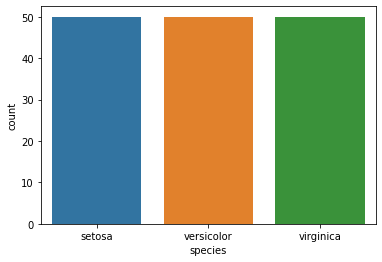

In [8]:
sns.countplot(data = df, x = 'species')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

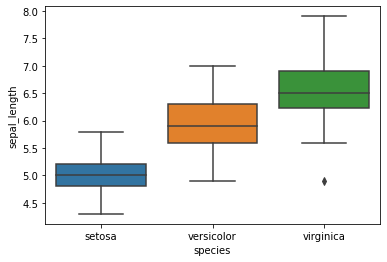

In [9]:
sns.boxplot(x='species', y = 'sepal_length', data = df)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

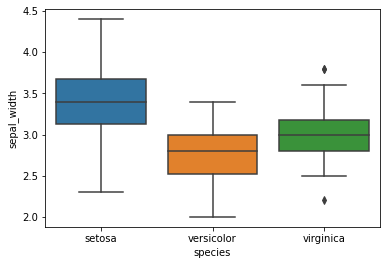

In [10]:
sns.boxplot(x='species', y = 'sepal_width', data = df)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

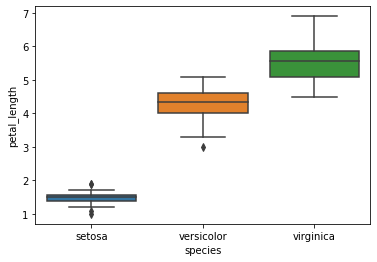

In [11]:
sns.boxplot(x='species', y = 'petal_length', data = df)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

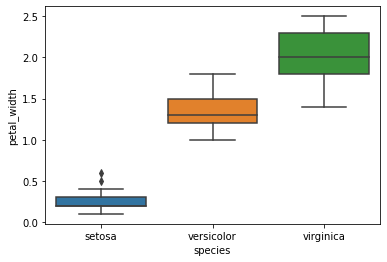

In [12]:
sns.boxplot(x='species', y = 'petal_width', data = df)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

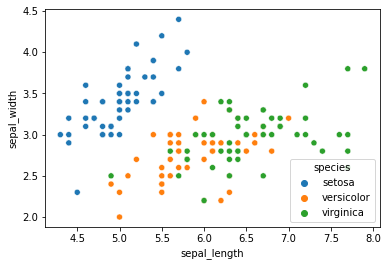

In [13]:
sns.scatterplot(x='sepal_length', y= 'sepal_width',data= df, hue= 'species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

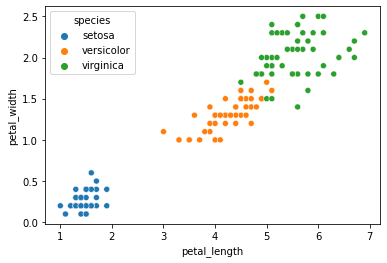

In [14]:
sns.scatterplot(x='petal_length', y= 'petal_width',data= df, hue= 'species')

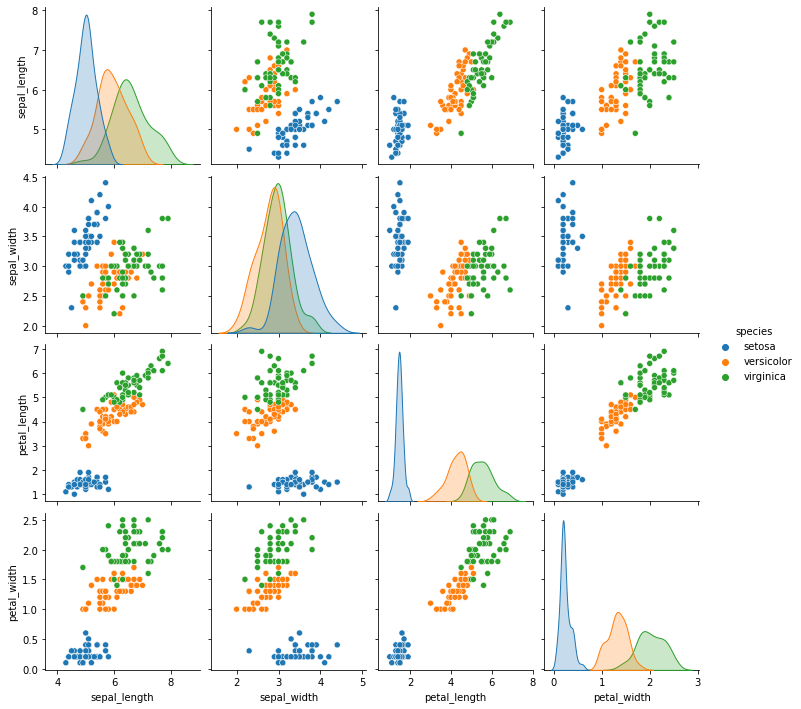

In [15]:
sns.pairplot(df,hue= 'species')

<AxesSubplot:>

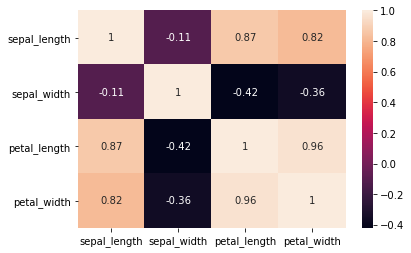

In [16]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='sepal_length', ylabel='species'>

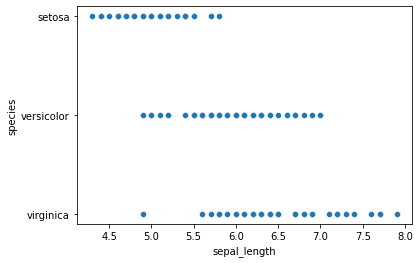

In [17]:
sns.scatterplot(x='sepal_length', y= 'species',data= df)

<AxesSubplot:xlabel='sepal_width', ylabel='species'>

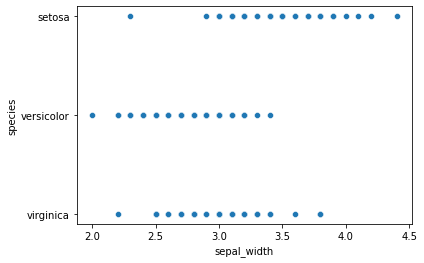

In [18]:
sns.scatterplot(x='sepal_width', y= 'species',data= df)

<AxesSubplot:xlabel='petal_length', ylabel='species'>

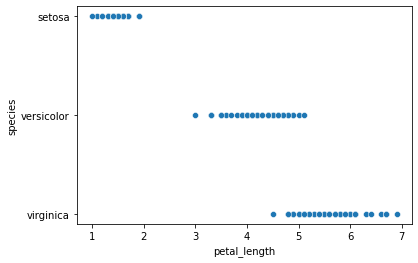

In [19]:
sns.scatterplot(x='petal_length', y= 'species',data= df)

<AxesSubplot:xlabel='petal_width', ylabel='species'>

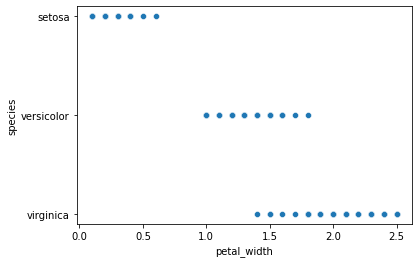

In [20]:
sns.scatterplot(x='petal_width', y= 'species',data= df)

In [21]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

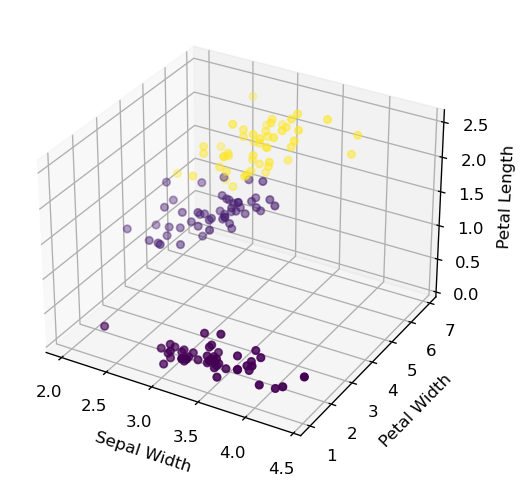

<Figure size 432x288 with 0 Axes>

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,5),dpi =120)
ax = fig.add_subplot(111,projection='3d')
colors = df['species'].map({'setosa':0,'versicolor':1,'virginica':12})
ax.scatter(df['sepal_width'],df['petal_length'],df['petal_width'],c=colors);
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Petal Length')
plt.show()
plt.tight_layout()

# Train|Test-split and scaling

In [23]:
X = df.drop('species', axis =1)
y = df['species']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [26]:
scaler = StandardScaler()

In [27]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
log_model= LogisticRegression(solver='saga',multi_class='ovr',max_iter=5000)

In [31]:
#help(LogisticRegression)

# Grid Search for best hypeparameter

In [32]:
penalty =['l1','l2']

In [33]:
C = np.logspace(0,4,10)

In [34]:
grid_model =GridSearchCV(log_model, param_grid={'C':C, 'penalty':penalty})

In [35]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [36]:
grid_model.best_params_

{'C': 7.742636826811269, 'penalty': 'l1'}

# Coeficient

In [60]:
log_model.coef_

array([[-1.38225901,  1.93935639, -2.37921665, -2.27318147],
       [-0.16704062, -1.23528895,  2.1007551 , -1.91536488],
       [-0.41182361, -1.16480927,  4.27908146,  5.71195641]])

# Model Performance and Classification

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix

In [62]:
y_pred = log_model.predict(scaled_X_test)

In [63]:
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [64]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [65]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

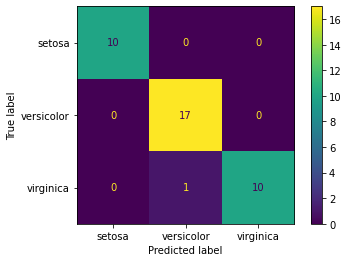

In [66]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

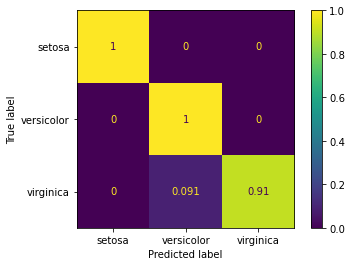

In [67]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')
#scaled to highest value=1

In [68]:
print(classification_report(y_test,y_pred))
#support = bil of the test

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [69]:
X_train.iloc[0]

sepal_length    5.6
sepal_width     2.7
petal_length    4.2
petal_width     1.3
Name: 94, dtype: float64

In [70]:
y_train.iloc[0]

'versicolor'

In [71]:
(X_train.iloc[0].values.reshape(1,-1))

array([[5.6, 2.7, 4.2, 1.3]])

In [72]:
log_model.predict(X_train.iloc[0].values.reshape(1,-1))

array(['virginica'], dtype=object)

# Evaluating Curves and AUC

we need to manually create the plotfor a multi-cross situation,Scikit_learns documentation already has plenty 

In [45]:
from sklearn.metrics import roc_curve,auc

In [46]:
def plot_multiclass_roc(clf,x_test,y_test,n_classes,figsize=(5,5)):
    y_score=clf.decision_function(x_test)
    
    #structures
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    #calculate dummies once
    y_test_dummies=pd.get_dummies(y_test,drop_first=False).values
    for i in range(n_classes):
        fpr[i],tpr[i],_=roc_curve(y_test_dummies[:,i],y_score[:,i])
        roc_auc[i]=auc(fpr[i],tpr[i])
        
    #roc for each class
    fig,ax=plt.subplots(figsize=figsize)
    ax.plot([0,1],[0,1],"k--")
    ax.set_xlim([0.0,1.0])
    ax.set_ylim([0.0,1.05])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("Receiver operating characteristic example")
    for i in range(n_classes):
        ax.plot(fpr[i],tpr[i],label="ROC curve(area=%0.2f)for label %i"%(roc_auc[i],i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

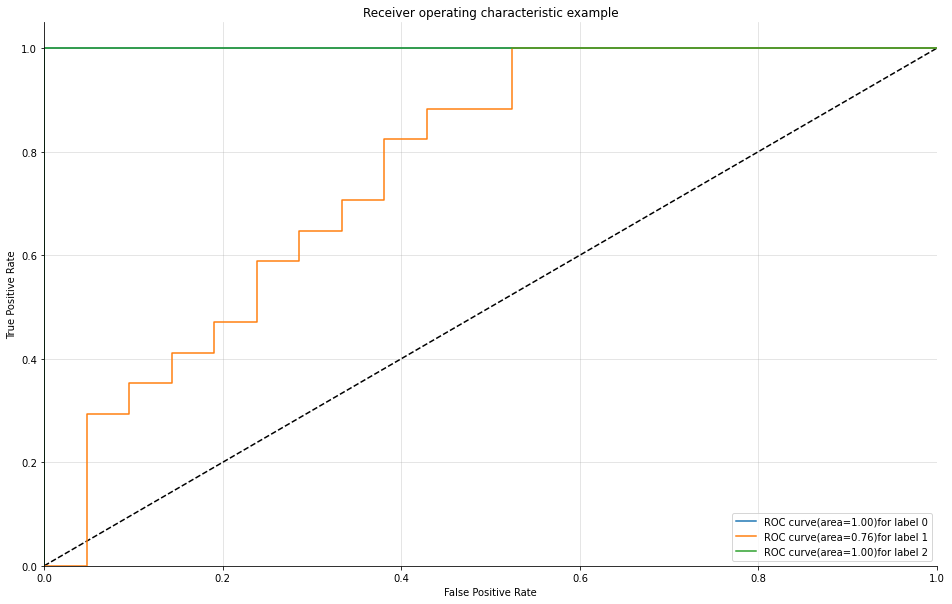

In [47]:
plot_multiclass_roc(grid_model, scaled_X_test,y_test, n_classes=3,figsize =(16,10))

# model Deployment

In [49]:
from joblib import dump , load

In [50]:
#save the Scaler and the model

In [51]:
dump (scaler, 'iris_scaler.pkl')

['iris_scaler.pkl']

In [52]:
#prepare the Model to save - use the C and the Penanlity got from the GridSearch

In [55]:
log_model= LogisticRegression(solver='saga',multi_class='ovr',max_iter=5000, C = 7.742636826811269)

In [57]:
log_model.fit (scaled_X_train,y_train)

LogisticRegression(C=7.742636826811269, max_iter=5000, multi_class='ovr',
                   solver='saga')

In [58]:
prediction = log_model.predict(scaled_X_test)

In [59]:
prediction

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [73]:
X_test_raw = scaler.inverse_transform(scaled_X_test)

In [74]:
X_test

sepal_length  sepal_width  petal_length  petal_width
33            5.5          4.2           1.4          0.2
16            5.4          3.9           1.3          0.4
43            5.0          3.5           1.6          0.6
129           7.2          3.0           5.8          1.6
50            7.0          3.2           4.7          1.4
123           6.3          2.7           4.9          1.8
68            6.2          2.2           4.5          1.5
53            5.5          2.3           4.0          1.3
146           6.3          2.5           5.0          1.9
1             4.9          3.0           1.4          0.2
147           6.5          3.0           5.2          2.0
32            5.2          4.1           1.5          0.1
31            5.4          3.4           1.5          0.4
122           7.7          2.8           6.7          2.0
127           6.1          3.0           4.9          1.8
74            6.4          2.9           4.3          1.3
88            5.6          3.0           4.1          1.3
96            5.7          2.9           4.2          1.3
42            4.4          3.2           1.3          0.2
134           6.1          2.6           5.6          1.4
80            5.5          2.4           3.8          1.1
48            5.3          3.7           1.5          0.2
90            5.5          2.6           4.4          1.2
65            6.7          3.1           4.4          1.4
97            6.2          2.9           4.3          1.3
64            5.6          2.9           3.6          1.3
93            5.0          2.3           3.3          1.0
114           5.8          2.8           5.1          2.4
25            5.0          3.0           1.6          0.2
41            4.5          2.3           1.3          0.3
104           6.5          3.0           5.8          2.2
89            5.5          2.5           4.0          1.3
116           6.5          3.0           5.5          1.8
82            5.8          2.7           3.9          1.2
112           6.8          3.0           5.5          2.1
55            5.7          2.8           4.5          1.3
86            6.7          3.1           4.7          1.5
61            5.9          3.0           4.2          1.5

In [75]:
X_test_raw

array([[5.5, 4.2, 1.4, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [5. , 3.5, 1.6, 0.6],
       [7.2, 3. , 5.8, 1.6],
       [7. , 3.2, 4.7, 1.4],
       [6.3, 2.7, 4.9, 1.8],
       [6.2, 2.2, 4.5, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.3, 2.5, 5. , 1.9],
       [4.9, 3. , 1.4, 0.2],
       [6.5, 3. , 5.2, 2. ],
       [5.2, 4.1, 1.5, 0.1],
       [5.4, 3.4, 1.5, 0.4],
       [7.7, 2.8, 6.7, 2. ],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.9, 4.3, 1.3],
       [5.6, 3. , 4.1, 1.3],
       [5.7, 2.9, 4.2, 1.3],
       [4.4, 3.2, 1.3, 0.2],
       [6.1, 2.6, 5.6, 1.4],
       [5.5, 2.4, 3.8, 1.1],
       [5.3, 3.7, 1.5, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [6.7, 3.1, 4.4, 1.4],
       [6.2, 2.9, 4.3, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5.8, 2.8, 5.1, 2.4],
       [5. , 3. , 1.6, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [6.5, 3. , 5.8, 2.2],
       [5.5, 2.5, 4. , 1.3],
       [6.5, 3. , 5.5, 1.8],
       [5.8, 2.7, 3.9, 1.2],
       [6.8, 3

In [83]:
df_predicted = pd.DataFrame(prediction)

In [79]:
type(y_test)

pandas.core.series.Series

In [80]:
compare x test and y test
df_predicted['y_test'] = y_test.to_frame().reset_index()['species']

In [81]:
df_predicted

0      y_test
0       setosa      setosa
1       setosa      setosa
2       setosa      setosa
3    virginica   virginica
4   versicolor  versicolor
5    virginica   virginica
6   versicolor  versicolor
7   versicolor  versicolor
8    virginica   virginica
9       setosa      setosa
10   virginica   virginica
11      setosa      setosa
12      setosa      setosa
13   virginica   virginica
14   virginica   virginica
15  versicolor  versicolor
16  versicolor  versicolor
17  versicolor  versicolor
18      setosa      setosa
19  versicolor   virginica
20  versicolor  versicolor
21      setosa      setosa
22  versicolor  versicolor
23  versicolor  versicolor
24  versicolor  versicolor
25  versicolor  versicolor
26  versicolor  versicolor
27   virginica   virginica
28      setosa      setosa
29      setosa      setosa
30   virginica   virginica
31  versicolor  versicolor
32   virginica   virginica
33  versicolor  versicolor
34   virginica   virginica
35  versicolor  versicolor
36  versicolor  versicolor
37  versicolor  versicolor

In [84]:
dump(log_model,'final_iris_model.h5')

['final_iris_model.h5']

In [85]:
#Predicting a single new flower

In [86]:
flower_model = load("final_iris_model.h5")

In [87]:
flower_scaler=load("iris_scaler.pkl")#loading the scaled model

In [89]:
df.head(1)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa

In [93]:
flower_example = {'sepal_length':5.1,
                  'sepal_width':3.5,
                  'petal_length':1.4,
                  'petal_width':0.2}

In [94]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [95]:
def return_prediction(model,scaler,sample_json):
    
    #for larger data features , you shoulds probably write a for lopp
    #That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = p
    
    #classes = np.array (['setosa','versicolor','virginica'])
    
    prediction = model.predict(flower)
    
    return prediction[0]

In [96]:
return_prediction(flower_model,flower_scaler,flower_example)

'setosa'

In [100]:
df.tail()

sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

In [ ]:
flower_example = {'sepal_length':5.1,
                  'sepal_width':3.5,
                  'petal_length':1.4,
                  'petal_width':0.2}